In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import os
import warnings

from summer.utils import ref_times_to_dti

from autumn.tools.project import get_project, load_timeseries
from autumn.tools.plots.utils import REF_DATE
from autumn.tools.runs import ManagedRun
from autumn.tools.runs.calibration.utils import get_posteriors
from autumn.tools.utils.pandas import pdfilt
from autumn.settings.region import Region

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Specify the runs of interest

In [37]:
run_id = "sm_sir/bangladesh/1650337726/cbe81c1"
region = "bangladesh"

In [4]:
mr = ManagedRun(run_id)

2022-04-19 14:43:56.212 INFO    botocore.credentials: Found credentials in shared credentials file: ~/.aws/credentials


In [5]:
# full_run = mr.full_run.get_derived_outputs()
pbi = mr.powerbi.get_db()
targets = pbi.get_targets()
results = pbi.get_uncertainty()
mcmc_params = mr.calibration.get_mcmc_params()

2022-04-19 14:43:59.187 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/powerbi/powerbi-sm_sir-bangladesh-1650337726-cbe81c1.db to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\powerbi\powerbi-sm_sir-bangladesh-1650337726-cbe81c1.db
2022-04-19 14:44:00.658 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/calibration_outputs/chain-0/mcmc_params.parquet to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-0\mcmc_params.parquet
2022-04-19 14:44:00.745 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/calibration_outputs/chain-0/mcmc_run.parquet to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-0\mcmc_run.parquet
2022-04-19 14:44:00.819 INFO    autumn.tools.utils.

2022-04-19 14:44:00.927 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/calibration_outputs/chain-1/mcmc_run.parquet to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-1\mcmc_run.parquet
2022-04-19 14:44:01.023 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/calibration_outputs/chain-2/mcmc_params.parquet to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-2\mcmc_params.parquet
2022-04-19 14:44:01.107 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/calibration_outputs/chain-2/mcmc_run.parquet to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-2\mcmc_run.parquet


2022-04-19 14:44:01.204 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/calibration_outputs/chain-3/mcmc_params.parquet to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-3\mcmc_params.parquet
2022-04-19 14:44:01.293 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/calibration_outputs/chain-3/mcmc_run.parquet to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-3\mcmc_run.parquet
2022-04-19 14:44:01.396 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/calibration_outputs/chain-4/mcmc_params.parquet to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-4\mcmc_params.parquet


2022-04-19 14:44:01.497 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/calibration_outputs/chain-4/mcmc_run.parquet to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-4\mcmc_run.parquet
2022-04-19 14:44:01.592 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/calibration_outputs/chain-5/mcmc_params.parquet to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-5\mcmc_params.parquet
2022-04-19 14:44:01.704 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/calibration_outputs/chain-5/mcmc_run.parquet to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-5\mcmc_run.parquet


2022-04-19 14:44:01.848 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/calibration_outputs/chain-6/mcmc_params.parquet to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-6\mcmc_params.parquet
2022-04-19 14:44:01.959 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/calibration_outputs/chain-6/mcmc_run.parquet to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-6\mcmc_run.parquet


2022-04-19 14:44:02.056 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/calibration_outputs/chain-7/mcmc_params.parquet to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-7\mcmc_params.parquet
2022-04-19 14:44:02.139 INFO    autumn.tools.utils.s3: Downloading from sm_sir/bangladesh/1650337726/cbe81c1/data/calibration_outputs/chain-7/mcmc_run.parquet to c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-7\mcmc_run.parquet
2022-04-19 14:44:02.218 INFO    autumn.tools.db.process: Collating db outputs into c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\mcmc_collated.db
2022-04-19 14:44:02.219 INFO    autumn.tools.db.process: Reading data from c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\165033772

2022-04-19 14:44:02.393 INFO    autumn.tools.db.process: Copying table mcmc_run
2022-04-19 14:44:02.435 INFO    autumn.tools.db.process: Reading data from c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-1
2022-04-19 14:44:02.436 INFO    autumn.tools.db.process: Copying table mcmc_params
2022-04-19 14:44:02.473 INFO    autumn.tools.db.process: Copying table mcmc_run
2022-04-19 14:44:02.506 INFO    autumn.tools.db.process: Reading data from c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_outputs\chain-2
2022-04-19 14:44:02.509 INFO    autumn.tools.db.process: Copying table mcmc_params
2022-04-19 14:44:02.555 INFO    autumn.tools.db.process: Copying table mcmc_run
2022-04-19 14:44:02.588 INFO    autumn.tools.db.process: Reading data from c:\users\jtrauer\pycharmprojects\autumn\data\outputs\runs\sm_sir\bangladesh\1650337726\cbe81c1\data\calibration_o

## Calibration parameters are:

In [6]:
list(mcmc_params.columns)

['age_stratification.cfr.multiplier',
 'age_stratification.prop_hospital.multiplier',
 'contact_rate',
 'testing_to_detection.assumed_cdr_parameter',
 'voc_emergence.omicron.contact_rate_multiplier',
 'voc_emergence.omicron.new_voc_seed.start_time']

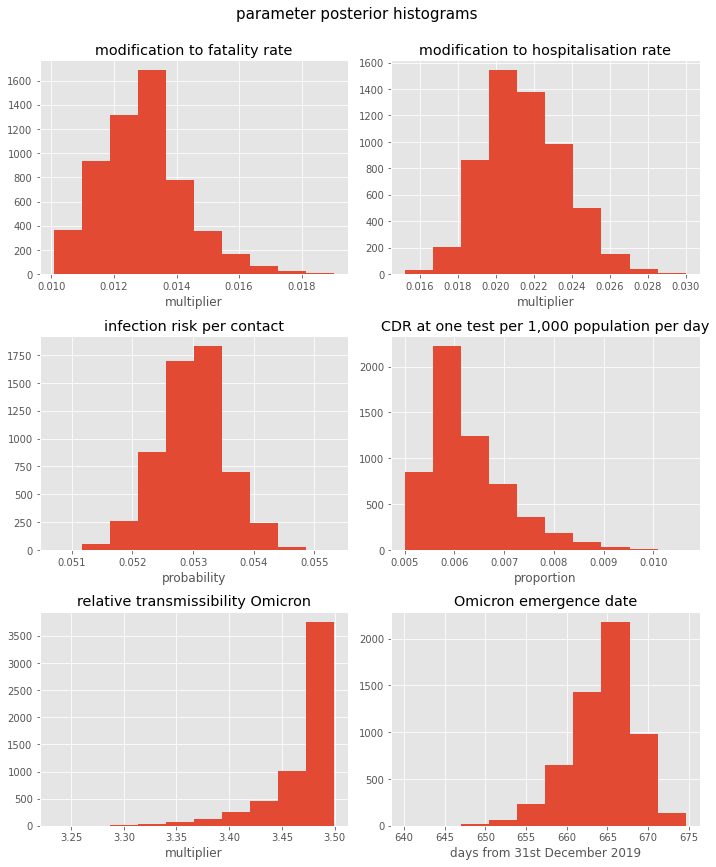

In [8]:
plt.style.use("ggplot")

param_lookup = {
    "contact_rate": "infection risk per contact",
    "testing_to_detection.assumed_cdr_parameter": "CDR at one test per 1,000 population per day",
    "voc_emergence.omicron.new_voc_seed.start_time": "Omicron emergence date",
    "voc_emergence.omicron.contact_rate_multiplier": "relative transmissibility Omicron",
    "age_stratification.cfr.multiplier": "modification to fatality rate",
    "age_stratification.prop_hospital.multiplier": "modification to hospitalisation rate",
}

unit_lookup = {
    "contact_rate": "probability",
    "testing_to_detection.assumed_cdr_parameter": "proportion",
    "voc_emergence.omicron.new_voc_seed.start_time": "days from 31st December 2019",
    "voc_emergence.omicron.contact_rate_multiplier": "multiplier",
    "age_stratification.cfr.multiplier": "multiplier",
    "age_stratification.prop_hospital.multiplier": "multiplier",
}

fig, axes = plt.subplots(3, 2, figsize=(10, 12))
for i_ax, axis in enumerate(axes.reshape(-1)):
    param = mcmc_params.columns[i_ax]
    axis.hist(mcmc_params[param])
    axis.set_title(param_lookup[param])
    axis.set_xlabel(unit_lookup[param])
fig.suptitle("parameter posterior histograms", fontsize=15, y=1)
fig.tight_layout()

## Available model outputs are:

In [38]:
project = get_project("sm_sir", region, reload=True)

### Get all targets, including those not used in calibration, to use as a validation

In [9]:
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", "..", ".."))
model, country, run, commit = run_id.split("/")
project_file_path = os.path.join(project_root, "autumn", "projects", model, country, country, "timeseries.json")
all_targets = load_timeseries(project_file_path)
for target in all_targets:
    all_targets[target].index = ref_times_to_dti(REF_DATE, all_targets[target].index)

NameError: name 'full_run' is not defined

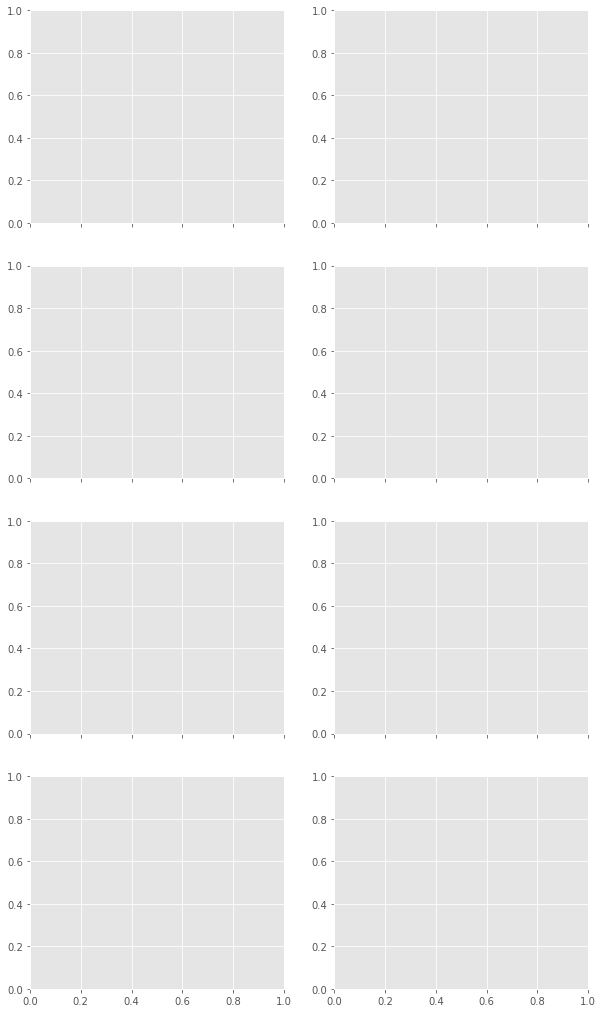

In [16]:
title_lookup = {
    "notifications": "daily notifications",
    "infection_deaths": "COVID-19-specific deaths",
    "hospital_admissions": "new daily hospital admissions",
    "icu_admissions": "new daily admissions to ICU",
    "proportion_seropositive": "proportion recovered from COVID-19",
    "incidence": "daily new infections",
    "prop_incidence_strain_delta": "proportion of cases due to Delta",
    "hospital_admissions": "daily hospital admissions",
    "hospital_occupancy": "total hospital beds",
    "icu_admissions": "daily ICU admissions",
    "icu_occupancy": "total ICU beds",
    "prop_ever_infected": "ever infected with Delta or Omicron",
    "cdr": "case detection rate",
}

fig, axes = plt.subplots(4, 2, figsize=(10, 18), sharex="all")
plot_left_date = datetime.date(2021, 5, 1)
plot_right_date = datetime.date(2022, 12, 31)
outputs = (
    "notifications", 
    "cdr",
    "hospital_admissions",
    "hospital_occupancy",
    "icu_admissions", 
    "icu_occupancy",
    "prop_ever_infected",
    "incidence",
)
for i_ax, axis in enumerate(axes.reshape(-1)):
    output = outputs[i_ax]
    scenario_chain = (full_run["scenario"] == 0) & (full_run["chain"] == 0)
    for i_run in full_run[scenario_chain]["run"].unique():
        selection = full_run[(full_run["run"] == i_run) & scenario_chain]
        axis.plot(ref_times_to_dti(REF_DATE, selection["times"]), selection[output])
    if output in all_targets and len(all_targets[output]) > 0:
        all_targets[output].plot.line(ax=axis, linewidth=0., markersize=10., marker="o")
#         axis.scatter(all_targets[output].index, all_targets[output], color="k", s=5, alpha=0.5, zorder=10)
    if output in targets:
        axis.scatter(targets.index, targets[output], facecolors="r", edgecolors="k", s=15, zorder=10)
    axis.tick_params(axis="x", labelrotation=45)
    axis.set_title(title_lookup[output])
    axis.set_xlim(left=plot_left_date, right=plot_right_date)

In [101]:
def plot_outputs(outputs, left_date):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex="all")
    colours = ((0.2, 0.2, 0.8), (0.8, 0.2, 0.2), (0.2, 0.8, 0.2), (0.8, 0.8, 0.2))
    for i_ax, axis in enumerate(axes.reshape(-1)):
        output = outputs[i_ax]
        for scenario in range(4):
            colour = colours[scenario]
            results_df = results[(output, scenario)]
            indices = results_df.index
            interval_label = "baseline" if scenario == 0 else project.param_set.scenarios[scenario - 1]["description"]
            scenario_zorder = 5 if scenario == 0 else scenario
            axis.fill_between(
                indices, results_df[0.025], results_df[0.975], color=colour, alpha=0.5,
                label="_nolegend_",
                zorder=scenario_zorder,
            )
            axis.fill_between(
                indices, results_df[0.25], results_df[0.75], color=colour, alpha=0.7, 
                label=interval_label,
                zorder=scenario_zorder
            )
            axis.plot(indices, results_df[0.500], color=colour)
            if output in all_targets and len(all_targets[output]) > 0:
                all_targets[output].plot.line(
                    ax=axis, 
                    linewidth=0., 
                    markersize=8.,
                    marker="o",
                    markerfacecolor="w",
                    markeredgecolor="w",
                    alpha=0.2,
                    label="_nolegend_",
                    zorder=5,
                )
            if output in targets:
                targets[output].plot.line(
                    ax=axis, 
                    linewidth=0., 
                    markersize=5., 
                    marker="o", 
                    markerfacecolor="k",
                    markeredgecolor="k",
                    label="_nolegend_",
                    zorder=6,
                )
            axis.tick_params(axis="x", labelrotation=45)
            axis.set_xlim(left=left_date)
            axis.set_title(title_lookup[output])
        if i_ax == 0:
            axis.legend()
    fig.tight_layout()

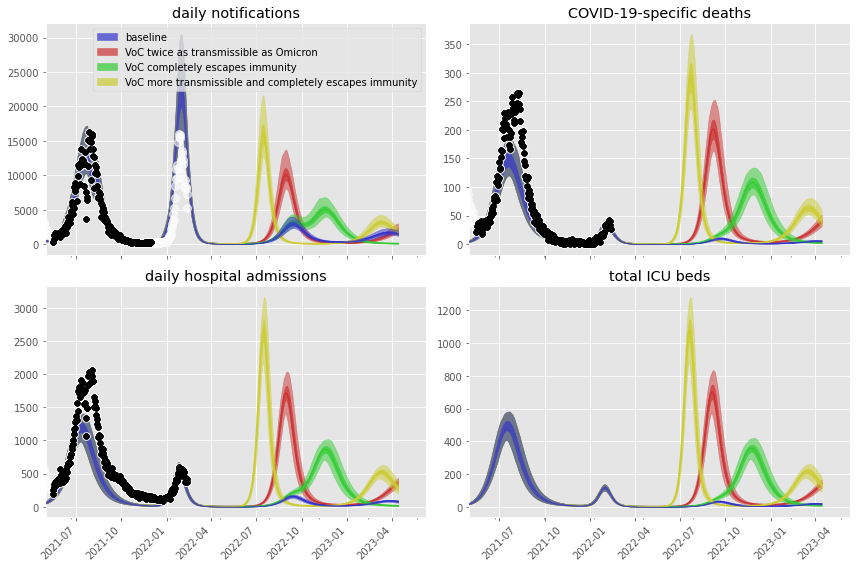

In [102]:
outputs_to_plot = (
    "notifications", 
    "infection_deaths",
    "hospital_admissions",
    "icu_occupancy",
)
plot_outputs(outputs_to_plot, plot_left_date)